## Load Dataset

In [15]:
import pandas as pd
import random as rd
import numpy as np
df = pd.read_csv('loan.csv')

seed = 42675
# 如果为 -1 则不设置随机数种子

## PART1: Data Cleaning

In [16]:
# Task1 deal with NULL rows, you can either choose to drop them or replace them with mean or other value 

# Checking the Missing Values

# A function used to fill missing data from the same column randomly
def random_FillMissingData(_df: pd.DataFrame, random_seed: int = -1) -> pd.DataFrame:
    df = _df.copy()
    for column in df.columns:
        data = df[column].copy()
        empty_rows = data.isnull()
        if (random_seed != -1):
            rd.seed(abs(random_seed))
        data[empty_rows] = rd.choices(data[~empty_rows].values, k = empty_rows.sum())
        df[column] = data
    return df

# df = df.dropna()
df = random_FillMissingData(df, random_seed=seed)

# DEBUG ONLY
# df.to_csv("./temp/temp1.csv", index=False) 
# print(df['Self_Employed'].value_counts())
# print(df.isnull().sum())

## PART2: Encode 




In [17]:
# Task2 deal with categorical features

df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Property_Area'] = df['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

# print(df.head())
# Loan_ID  Gender  Married  Dependents  Education  Self_Employed 

# ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term

# Credit_History  Property_Area
# df.drop(df.columns[[0,1,2,3,4,5,6,7,8,9,11]], axis=1, inplace=True)
df.drop(df.columns[[0, 1, 2, 4, 8]], axis=1, inplace=True)
# df.drop(df.columns[[0]], axis=1, inplace=True)

df = df.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x))).round(4)

# DEBUG ONLY
# df.to_csv("./temp/temp2.csv", index=False) 


## PART3: Data Process

In [18]:
# Task3 split the dataset into X_train, X_test, y_train, y_test
# Optional: you can also use normalization

def random_Split_data(data: pd.DataFrame, rate = 0.75, random_seed: int = -1):
    m, n = data.shape
    if random_seed != -1:
        np.random.seed(abs(random_seed))
    data.reindex(np.random.permutation(data.index))

    row_split = int(m * rate)
    X_train = df.iloc[0: row_split, 0: n - 1].values
    y_train = df.iloc[0: row_split, n - 1: ].values
    X_test = df.iloc[row_split: m, 0: n - 1].values
    y_test = df.iloc[row_split: m, n - 1: ].values
    
    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test = random_Split_data(df, rate=0.7)


## PART4: Train

In [19]:
# Task4 train your model and plot the loss curve of training
from Logistic import LogisticRegression
import matplotlib.pyplot as plt


lr = LogisticRegression(penalty='l2', gamma=1)
times, loss = lr.fit(X_train, y_train, lr=0.0005, tol=1e-2,method='newton')
pred = lr.predict(X_test)

# DEBUG ONLY
# print(loss)
# print(pred)
# print(lr.w)

## PART5: Figure

Accuracy = 0.8594594594594595


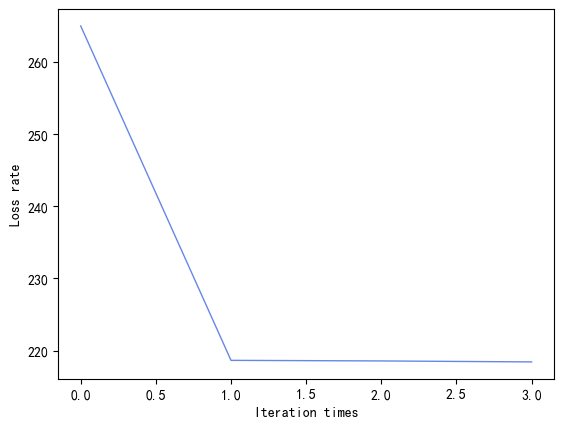

In [20]:
# Task5 compare the accuracy(or other metrics you want) of test data with different parameters you train with
import pylab as pl
pl.mpl.rcParams['font.sans-serif'] = ['SimHei']  
sum = 0
count = 0
for i in range(len(y_test)):
    if y_test[i] == pred[i]:
        count += 1
    sum += 1
print("Accuracy = {}".format(count / sum))

def show(times, loss, color = '#4169E1'):
    x_axis_data = list(range(times + 1))[0:1500]
    y_axis_data = loss[0:1500]
    plt.plot(x_axis_data, y_axis_data, color=color, alpha=0.8, linewidth=1)


show(times, loss)


plt.xlabel('Iteration times')
plt.ylabel('Loss rate')
plt.show()


### Parameters

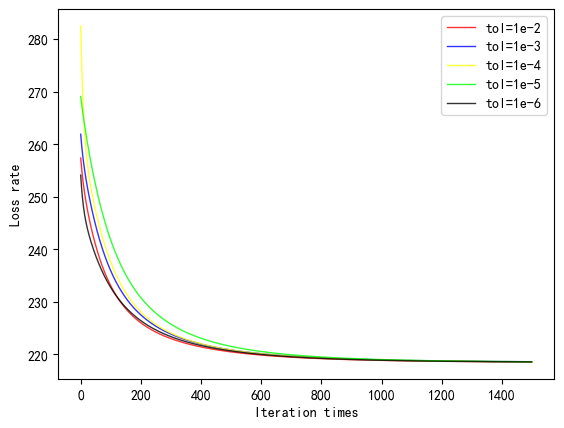

In [21]:
RED = '#FF0000'
PINK = '#FF1493'
PURPLE = '#A020F0'
ORANGE = '#FF7F00'
TOMATO = '#EE5C42'
BLUE = '#0000FF'
SKY = '#00BFFF'
GREEN = '#00FF00'
LIGHTGREEN = '#90EE90' 
BLACK = '#000000'
YELLOW = '#FFFF00'

lr = LogisticRegression(penalty='l2', gamma=1)
times, loss = lr.fit(X_train, y_train, lr=0.0005, tol=1e-2)
pred = lr.predict(X_test)
show(times, loss, color=RED)

lr = LogisticRegression(penalty='l2', gamma=1)
times, loss = lr.fit(X_train, y_train, lr=0.0005, tol=1e-3)
pred = lr.predict(X_test)
show(times, loss, color=BLUE)

lr = LogisticRegression(penalty='l2', gamma=1)
times, loss = lr.fit(X_train, y_train, lr=0.0005, tol=1e-4)
pred = lr.predict(X_test)
show(times, loss, color=YELLOW)

lr = LogisticRegression(penalty='l2', gamma=1)
times, loss = lr.fit(X_train, y_train, lr=0.0005, tol=1e-5)
pred = lr.predict(X_test)
show(times, loss, color=GREEN)

lr = LogisticRegression(penalty='l2', gamma=1)
times, loss = lr.fit(X_train, y_train, lr=0.0005, tol=1e-6)
pred = lr.predict(X_test)
show(times, loss, color=BLACK)

plt.legend(['tol=1e-2', 'tol=1e-3', 'tol=1e-4', 'tol=1e-5', 'tol=1e-6'], loc='upper right')
plt.xlabel('Iteration times')
plt.ylabel('Loss rate')
plt.show()